# Rest Countries
Get information about countries via a RESTful API



In [1]:
import requests
import pandas as pd

In [2]:
url = "https://restcountries.com/v3.1/region/europe"
response = requests.get(url)
data = response.json()
print(data[10])


{'name': {'common': 'United Kingdom', 'official': 'United Kingdom of Great Britain and Northern Ireland', 'nativeName': {'eng': {'official': 'United Kingdom of Great Britain and Northern Ireland', 'common': 'United Kingdom'}}}, 'tld': ['.uk'], 'cca2': 'GB', 'ccn3': '826', 'cca3': 'GBR', 'cioc': 'GBR', 'independent': True, 'status': 'officially-assigned', 'unMember': True, 'currencies': {'GBP': {'name': 'British pound', 'symbol': '£'}}, 'idd': {'root': '+4', 'suffixes': ['4']}, 'capital': ['London'], 'altSpellings': ['GB', 'UK', 'Great Britain'], 'region': 'Europe', 'subregion': 'Northern Europe', 'languages': {'eng': 'English'}, 'translations': {'ara': {'official': 'المملكة المتحدة لبريطانيا العظمى وايرلندا الشمالية', 'common': 'المملكة المتحدة'}, 'bre': {'official': 'Rouantelezh-Unanet Breizh-Veur ha Norzhiwerzhon', 'common': 'Rouantelezh-Unanet'}, 'ces': {'official': 'Spojené království Velké Británie a Severního Irska', 'common': 'Spojené království'}, 'cym': {'official': 'United Ki

In [3]:
for country in data:
    print(country['name']['common'])

Moldova
Bulgaria
Germany
Albania
Montenegro
Spain
Sweden
Andorra
Malta
Czechia
United Kingdom
Gibraltar
Cyprus
Monaco
Russia
Ireland
France
Belarus
Portugal
Croatia
Liechtenstein
Hungary
Iceland
Poland
Switzerland
North Macedonia
Kosovo
Belgium
Serbia
Netherlands
Denmark
Luxembourg
Faroe Islands
Slovenia
Ukraine
Finland
Austria
Bosnia and Herzegovina
Greece
Guernsey
Estonia
San Marino
Vatican City
Italy
Slovakia
Lithuania
Isle of Man
Norway
Latvia
Romania
Svalbard and Jan Mayen
Jersey
Åland Islands


In [4]:
countries_list = [country["name"]["common"] for country in data]

In [5]:
print(countries_list)

['Moldova', 'Bulgaria', 'Germany', 'Albania', 'Montenegro', 'Spain', 'Sweden', 'Andorra', 'Malta', 'Czechia', 'United Kingdom', 'Gibraltar', 'Cyprus', 'Monaco', 'Russia', 'Ireland', 'France', 'Belarus', 'Portugal', 'Croatia', 'Liechtenstein', 'Hungary', 'Iceland', 'Poland', 'Switzerland', 'North Macedonia', 'Kosovo', 'Belgium', 'Serbia', 'Netherlands', 'Denmark', 'Luxembourg', 'Faroe Islands', 'Slovenia', 'Ukraine', 'Finland', 'Austria', 'Bosnia and Herzegovina', 'Greece', 'Guernsey', 'Estonia', 'San Marino', 'Vatican City', 'Italy', 'Slovakia', 'Lithuania', 'Isle of Man', 'Norway', 'Latvia', 'Romania', 'Svalbard and Jan Mayen', 'Jersey', 'Åland Islands']


In [8]:
# Funzione per estrarre i dati in un formato piatto.
def extract_country_info(country_name):
    url = f"https://restcountries.com/v3.1/name/{country_name}"
    response = requests.get(url)
    if response.status_code == 200:
        country_data = response.json()[0]
        print(len(country_data))
        country_info = {
        "common_name": country_data["name"]["common"],
        "native_name": next(iter(country_data["name"]["nativeName"].values()))["official"],
        "currency_name": next(iter(country_data["currencies"].values()))["name"],
        "capital": country_data["capital"][0],
        "region": country_data["region"],
        "subregion": country_data["subregion"],
        "official_language": next(iter(country_data["languages"].values())),
        "latitude": country_data["latlng"][0],
        "longitude": country_data["latlng"][1],
        "landlocked": country_data["landlocked"],
        "borders": ','.join(country_data["borders"]) if "borders" in country_data else None,
        "area": country_data["area"],
        "population": country_data["population"],
        "flag": country_data["flags"]["png"],
        # "flag_description": country_data["flags"]["alt"],
        "capital_latitude": country_data["capitalInfo"]["latlng"][0],
        "capital_longitude": country_data["capitalInfo"]["latlng"][1],
        "gini_index_2016": country_data["gini"]["2016"] if "gini" in country_data and "2016" in country_data["gini"] else None,
        # "fifa_code": country_data["fifa"],
        # "car_sign": ', '.join(country_data["car"]["signs"]),
        "drive_side": country_data["car"]["side"],
        # "timezones": ', '.join(country_data["timezones"]),
        "continents": ', '.join(country_data["continents"]),
        "start_of_week": country_data["startOfWeek"],
        # "postal_code_format": country_data["postalCode"]["format"],
        # "postal_code_regex": country_data["postalCode"]["regex"]
        }
        return country_info
    else:
        print(f"Error: {response.status_code}")
        return None




In [9]:
# Estraiamo i dati in un lista di json
countries_data = [extract_country_info(country) for country in countries_list]
df = pd.DataFrame(countries_data)

35
35
35
34
35
35
35
34
34
35
34
32
34
33
35
34
35
35
35
35
34
35
34
35
35
35
31
35
35
30
35
35
32
35
35
35
35
35
35
31
35
34
31
35
35
35
31
35
35
35
30
31
30


In [10]:
df


,common_name,native_name,currency_name,capital,region,subregion,official_language,latitude,longitude,landlocked,...,area,population,flag,capital_latitude,capital_longitude,gini_index_2016,drive_side,timezones,continents,start_of_week
0,Moldova,Republica Moldova,Moldovan leu,Chișinău,Europe,Eastern Europe,Romanian,47.000000,29.000000,True,...,33846.00,2617820,https://flagcdn.com/w320/md.png,47.01,28.90,NaN,right,UTC+02:00,Europe,monday
1,Bulgaria,Република България,Bulgarian lev,Sofia,Europe,Southeast Europe,Bulgarian,43.000000,25.000000,False,...,110879.00,6927288,https://flagcdn.com/w320/bg.png,42.68,23.32,NaN,right,UTC+02:00,Europe,monday
2,Germany,Bundesrepublik Deutschland,Euro,Berlin,Europe,Western Europe,German,51.000000,9.000000,False,...,357114.00,83240525,https://flagcdn.com/w320/de.png,52.52,13.40,31.9,right,UTC+01:00,Europe,monday
3,Albania,Republika e Shqipërisë,Albanian lek,Tirana,Europe,Southeast Europe,Albanian,41.000000,20.000000,False,...,28748.00,2837743,https://flagcdn.com/w320/al.png,41.32,19.82,NaN,right,UTC+01:00,Europe,monday
4,Montenegro,Црна Гора,Euro,Podgorica,Europe,Southeast Europe,Montenegrin,42.500000,19.300000,False,...,13812.00,621718,https://flagcdn.com/w320/me.png,42.43,19.27,38.5,right,UTC+01:00,Europe,monday
5,Spain,Reino de España,Euro,Madrid,Europe,Southern Europe,Spanish,40.000000,-4.000000,False,...,505992.00,47351567,https://flagcdn.com/w320/es.png,40.40,-3.68,NaN,right,"UTC, UTC+01:00",Europe,monday
6,Sweden,Konungariket Sverige,Swedish krona,Stockholm,Europe,Northern Europe,Swedish,62.000000,15.000000,False,...,450295.00,10353442,https://flagcdn.com/w320/se.png,59.33,18.05,NaN,right,UTC+01:00,Europe,monday
7,Andorra,Principat d'Andorra,Euro,Andorra la Vella,Europe,Southern Europe,Catalan,42.500000,1.500000,True,...,468.00,77265,https://flagcdn.com/w320/ad.png,42.50,1.52,NaN,right,UTC+01:00,Europe,monday
8,Malta,Republic of Malta,Euro,Valletta,Europe,Southern Europe,English,35.937500,14.375400,False,...,316.00,525285,https://flagcdn.com/w320/mt.png,35.88,14.50,NaN,left,UTC+01:00,Europe,monday
9,Czechia,Česká republika,Czech koruna,Prague,Europe,Central Europe,Czech,49.750000,15.500000,True,...,78865.00,10698896,https://flagcdn.com/w320/cz.png,50.08,14.47,NaN,right,UTC+01:00,Europe,monday


In [11]:
# save locally the data in a pickle file
df.to_pickle("countries_data.pkl")

In [51]:
# load the data from the pickle file
df = pd.read_pickle("countries_data.pkl")

In [52]:
print(df.describe(include='all'))

       common_name        native_name currency_name   capital  region  \
count           53                 53            53        53      53   
unique          53                 53            23        53       2   
top        Moldova  Republica Moldova          Euro  Chișinău  Europe   
freq             1                  1            26         1      52   
mean           NaN                NaN           NaN       NaN     NaN   
std            NaN                NaN           NaN       NaN     NaN   
min            NaN                NaN           NaN       NaN     NaN   
25%            NaN                NaN           NaN       NaN     NaN   
50%            NaN                NaN           NaN       NaN     NaN   
75%            NaN                NaN           NaN       NaN     NaN   
max            NaN                NaN           NaN       NaN     NaN   

              subregion official_language   latitude   longitude landlocked  \
count                53                53  5

In [53]:
print(df.columns)

Index(['common_name', 'native_name', 'currency_name', 'capital', 'region',
       'subregion', 'official_language', 'latitude', 'longitude', 'landlocked',
       'borders', 'area', 'population', 'flag', 'capital_latitude',
       'capital_longitude', 'gini_index_2016', 'drive_side', 'timezones',
       'continents', 'start_of_week'],
      dtype='object')


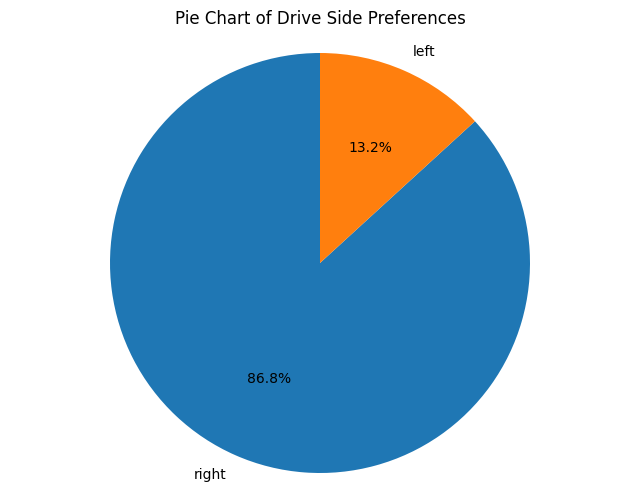

In [54]:
# Count the frequency of each drive side
drive_side_counts = df['drive_side'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(drive_side_counts, labels=drive_side_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Pie Chart of Drive Side Preferences')
plt.show()

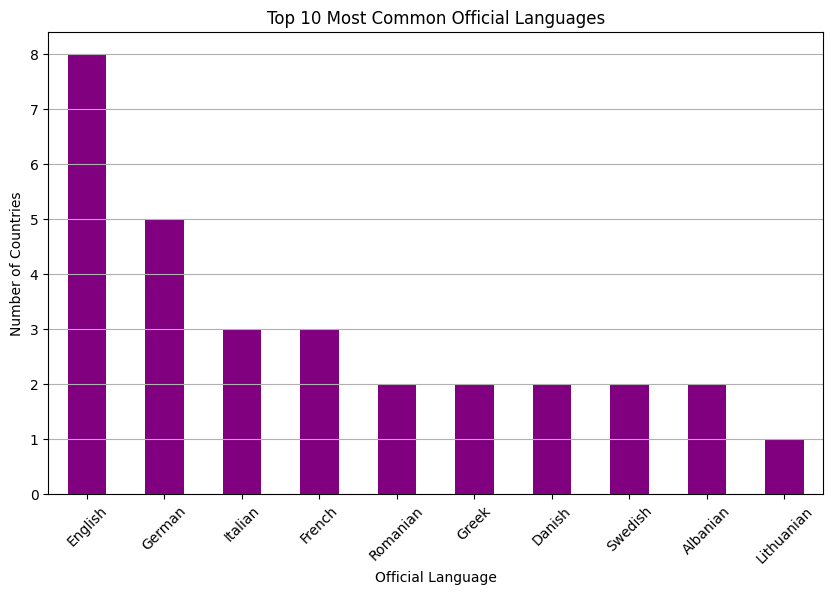

In [55]:
# Bar chart of most common official languages
language_counts = df['official_language'].value_counts().head(10)  # Top 10 languages

plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar', color='purple')
plt.title('Top 10 Most Common Official Languages')
plt.xlabel('Official Language')
plt.ylabel('Number of Countries')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


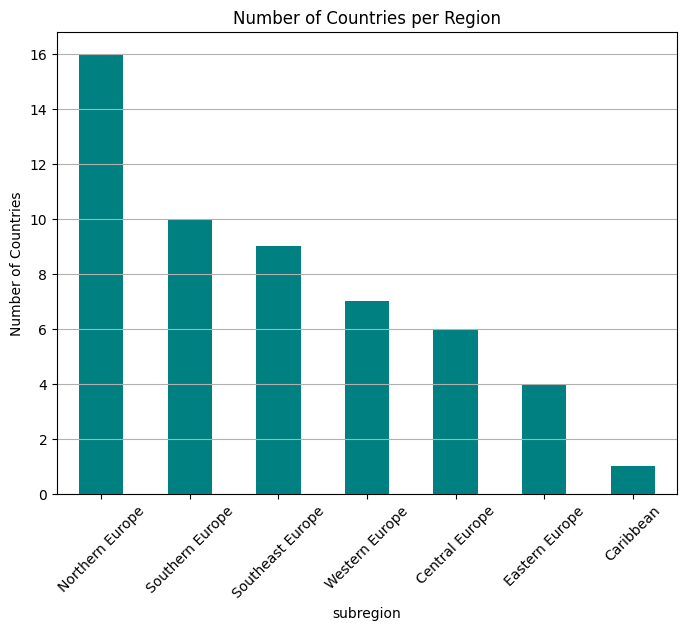

In [56]:
# Bar chart of countries per region
region_counts = df['subregion'].value_counts()

plt.figure(figsize=(8, 6))
region_counts.plot(kind='bar', color='teal')
plt.title('Number of Countries per Region')
plt.xlabel('subregion')
plt.ylabel('Number of Countries')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


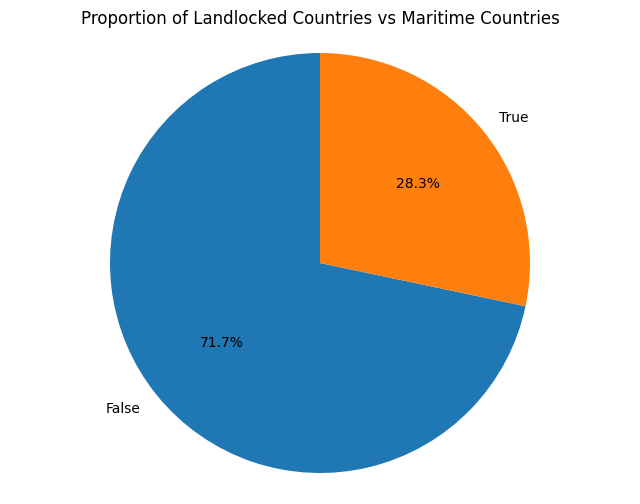

In [57]:
# Pie chart of landlocked status
landlocked_counts = df['landlocked'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(landlocked_counts, labels=landlocked_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Landlocked Countries vs Maritime Countries')
plt.show()


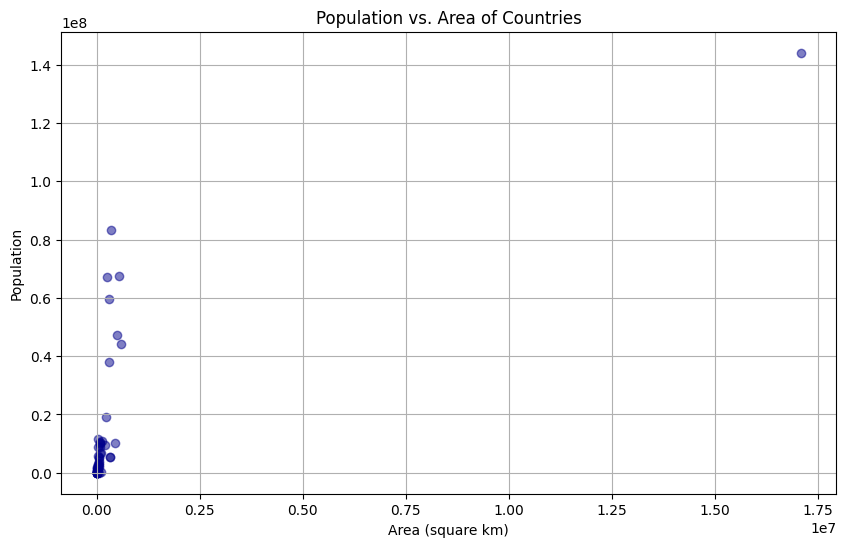

In [58]:
# Scatter plot of population vs. area
plt.figure(figsize=(10, 6))
plt.scatter(df['area'], df['population'], color='darkblue', alpha=0.5)
plt.title('Population vs. Area of Countries')
plt.xlabel('Area (square km)')
plt.ylabel('Population')
plt.grid(True)
plt.show()


In [59]:
# print the countries with the highest area
top_five_area = df.sort_values(by='area', ascending=False).head(5)[['common_name', 'area']]
print(top_five_area)
# remove russia
df2 = df[df['common_name'] != 'Russia'] 

   common_name        area
14      Russia  17098242.0
34     Ukraine    603500.0
16      France    551695.0
5        Spain    505992.0
6       Sweden    450295.0


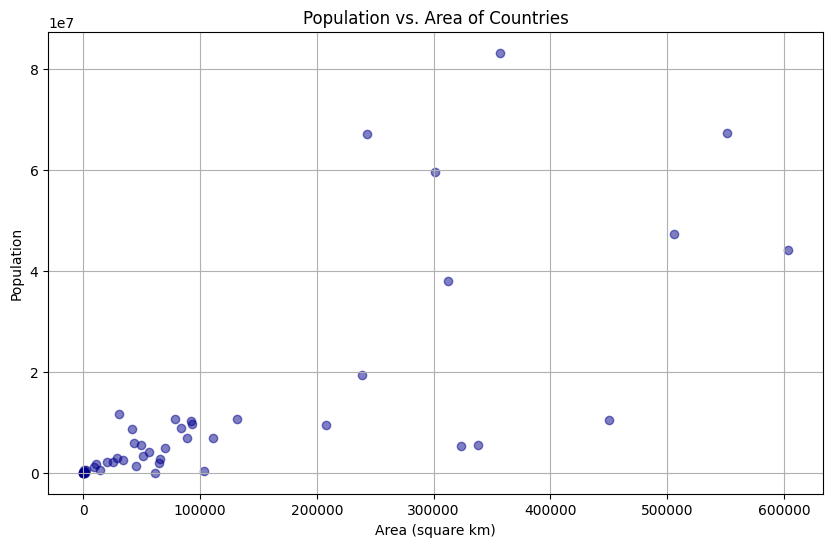

In [60]:
# Scatter plot of population vs. area
plt.figure(figsize=(10, 6))
plt.scatter(df2['area'], df2['population'], color='darkblue', alpha=0.5)
plt.title('Population vs. Area of Countries')
plt.xlabel('Area (square km)')
plt.ylabel('Population')
plt.grid(True)
plt.show()


In [44]:
!pip install scipy
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 11.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.2/301.2 kB 9.3 MB/s eta 0:00:00


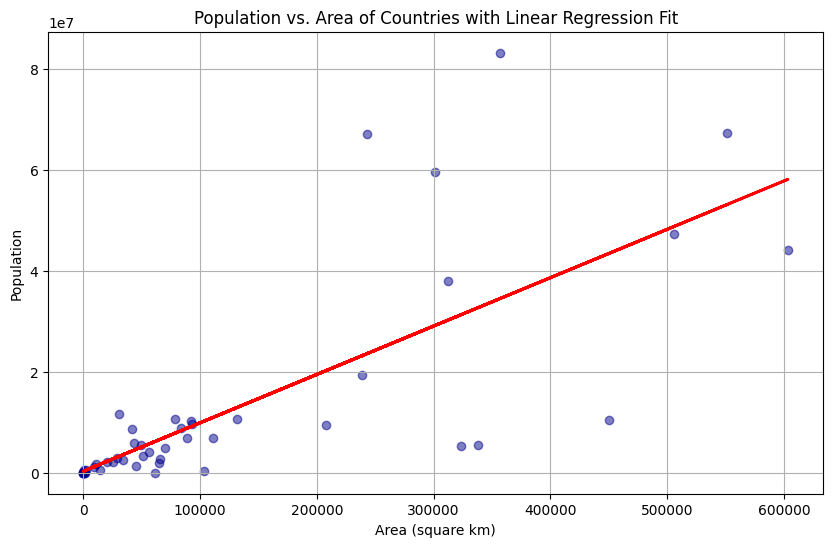

In [64]:
# fit a linear regression model
from sklearn.linear_model import LinearRegression
# drop the row with missing values
df = df.dropna(subset=['area', 'population'])
# Assume df is your DataFrame and it's already cleaned up for any NaN values in 'area' and 'population'
X = df2['area'].values.reshape(-1, 1)  # Reshape for sklearn
y = df2['population'].values.reshape(-1, 1)

# Create a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict y values for the given X
y_pred = model.predict(X)

# Scatter plot of population vs. area
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='darkblue', alpha=0.5)
plt.plot(X, y_pred, color='red', linewidth=2)  # Regression line
plt.title('Population vs. Area of Countries with Linear Regression Fit')
plt.xlabel('Area (square km)')
plt.ylabel('Population')
plt.grid(True)
plt.show()

In [68]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# Predicting using the model
y_pred = model.predict(X)

# Coefficients and Intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# R-squared
r2 = r2_score(y, y_pred)
print("R-squared:", r2)

# Mean Squared Error and Root Mean Squared Error
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Coefficients: [[95.83598853]]
Intercept: [317306.52955072]
R-squared: 0.5723398868285303
Mean Squared Error: 165775986514597.44
Root Mean Squared Error: 12875402.38262857
